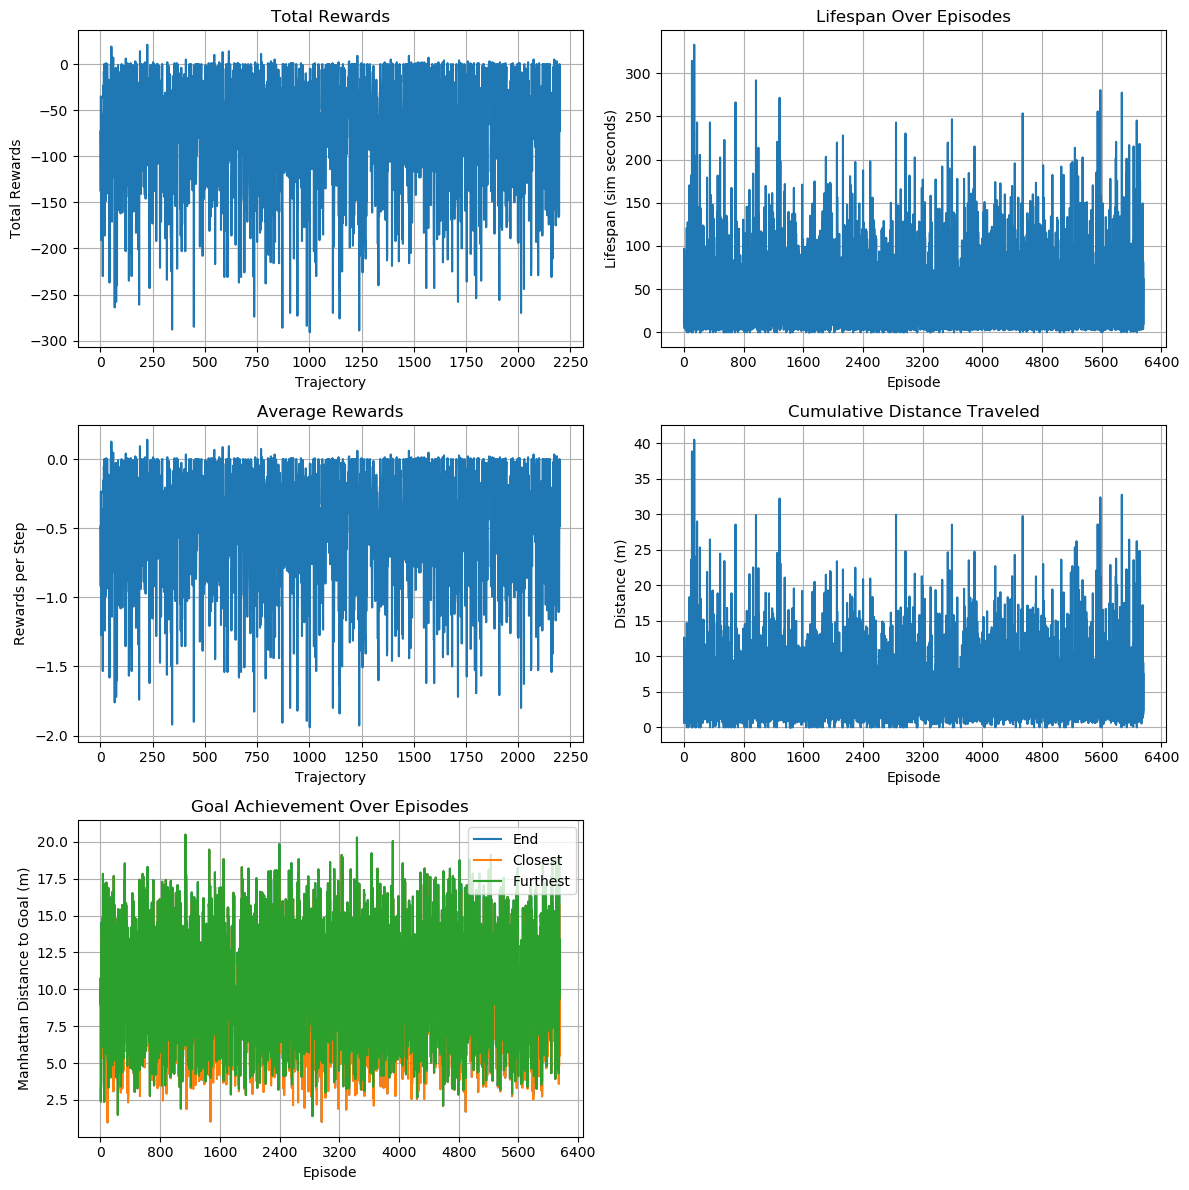

Text(0, 0.5, 'BCE Loss')

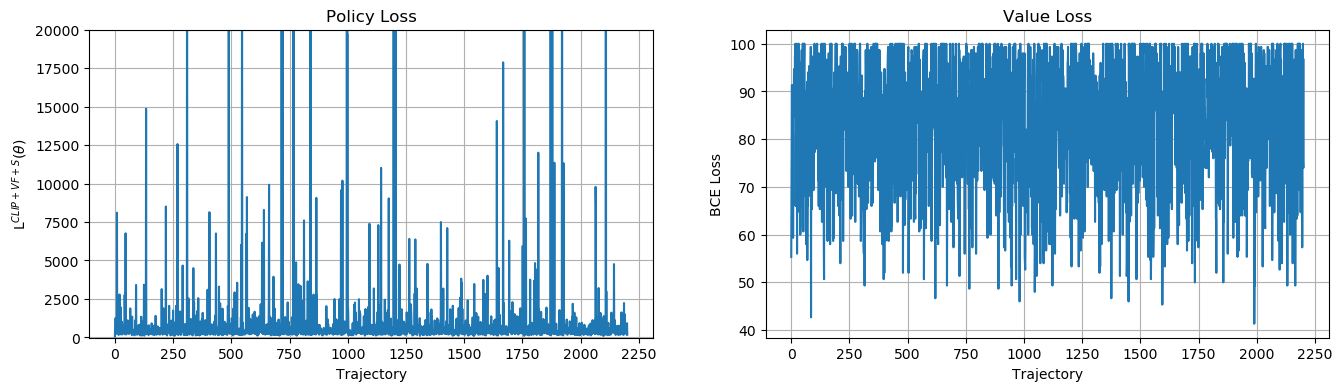

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import yaml

hyperparameters = '/media/ryan/DataPad/ros_ws/src/notspot_sim_py/src/reinforcement_learning/config/hyperparameters.yaml'
with open(hyperparameters, 'r') as file:
        hyperparameters = yaml.safe_load(file)['hyperparameters']

# Sorting function to ensure files are processed in numerical order
def sort_key(filename):
    parts = filename.split('_')
    number_part = parts[1].split('.')[0]  # Get the part of the filename that is the number
    return int(number_part)

def get_logs(run_path, folder_name):
    directory_path = os.path.join(run_path, folder_name)
    # List to hold all the values
    values = []

    # Loop through each file in the directory
    for filename in sorted(os.listdir(directory_path), key=sort_key):
        if filename.endswith('.txt'):
            # Construct the full file path
            file_path = os.path.join(directory_path, filename)
            # Open and read the file
            with open(file_path, 'r') as file:
                for line in file:
                    # Append the line to the values list
                    values.append(line.strip())  # No need to convert to float for goal data

    return values


# Path to the directory containing the files
runs = [
    "2024_04_28_18_26_57",
    "2024_05_03_11_20_58",
    "2024_05_06_20_40_23",
    "2024_05_07_23_01_56",
    "2024_05_15_15_28_38",
    "2024_05_15_22_50_25",
    "2024_05_18_21_09_27",
    "2024_05_20_15_11_05",
    "2024_06_01_18_24_10"
]
run = '/media/ryan/Media/Grad_Project/runs/' + runs[-1]




rewards = [float(reward) for i, reward in enumerate(get_logs(run, "rewards")) if i%2 == 0]
trajectory_lengths = [float(length) for i, length in enumerate(get_logs(run, "rewards")) if i%2 == 1]
rewards_per_step = [float(reward / update) for reward, update in zip(rewards, trajectory_lengths)]

lifespans = [int(lifespan)*0.75 for lifespan in get_logs(run, "steps")]
closest_goal = [float(dist) for i, dist in enumerate(get_logs(run, "goal")) if i%3 == 0]
furthest_goal = [float(dist) for i, dist in enumerate(get_logs(run, "goal")) if i%3 == 1]
ending_goal = [float(dist) for i, dist in enumerate(get_logs(run, "goal")) if i%3 == 2]
distance_cum = [float(dist) for i, dist in enumerate(get_logs(run, "distance")) if i%2 == 0]
distance_start = [float(dist) for i, dist in enumerate(get_logs(run, "distance")) if i%2 == 1]
environments = [int(env) for env in get_logs(run, "environment")]
# rewards_per_step = [reward / (0.75 * hyperparameters['max_trajectory_length']) for reward in rewards]

policy_loss = [float(loss) for loss in get_logs(run+'/models/loss', "policy")]
value_loss = [float(loss) for loss in get_logs(run+'/models/loss', "value")]


# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for ax in axs.flatten():
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.grid(True)


# Plot total rewards over episodes
axs[0, 0].plot(rewards)
axs[0, 0].set_title('Total Rewards')
axs[0, 0].set_xlabel('Trajectory')
axs[0, 0].set_ylabel('Total Rewards')
# axs[0, 0].legend()

# Plot average rewards per step over episodes
axs[1, 0].plot(rewards_per_step)
axs[1, 0].set_title('Average Rewards')
axs[1, 0].set_xlabel('Trajectory')
axs[1, 0].set_ylabel('Rewards per Step')
# axs[0, 1].legend()

# Plot lifespan over episodes
axs[0, 1].plot(lifespans)
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Lifespan (sim seconds)')
axs[0, 1].set_title('Lifespan Over Episodes')
# axs[1, 0].legend()

# Plot goal achievement over episodes
# axs[2, 0].plot([9.16126]*len(closest_goal), label='Start', color='red')
axs[2, 0].plot(ending_goal, label='End')
axs[2, 0].plot(closest_goal, label='Closest')
axs[2, 0].plot(furthest_goal, label='Furthest')
axs[2, 0].set_xlabel('Episode')
axs[2, 0].set_ylabel('Manhattan Distance to Goal (m)')
axs[2, 0].set_title('Goal Achievement Over Episodes')
axs[2, 0].legend()
# axs[2, 0].set_ybound(0, 11)

# Plot cumulative distance traveled over episodes
axs[1, 1].plot(distance_cum, label='Distance')
axs[1, 1].set_title('Cumulative Distance Traveled')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Distance (m)')
# axs[1, 1].legend()

# Hide the empty subplot
# axs[2, 1].plot(distance_start)
# axs[2, 1].set_title('Max Manhattan Distance from Start')
# axs[2, 1].set_xlabel('Episode')
# axs[2, 1].set_ylabel('Distance (m)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for ax in axs.flatten():
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.grid(True)


# Plot total rewards over episodes
axs[0].plot(policy_loss)
axs[0].set_title('Policy Loss')
axs[0].set_xlabel('Trajectory')
axs[0].set_ylabel(r'L$^{CLIP+VF+S}$($\theta$)')
axs[0].set_ybound(-20,20000)
# axs[0].legend()

# Plot average rewards per step over episodes
axs[1].plot(value_loss)
axs[1].set_title('Value Loss')
axs[1].set_xlabel('Trajectory')
axs[1].set_ylabel('BCE Loss')
# axs[1].set_ybound(-25,100)
# axs[1].legend()


Text(0, 0.5, 'MSE Loss')

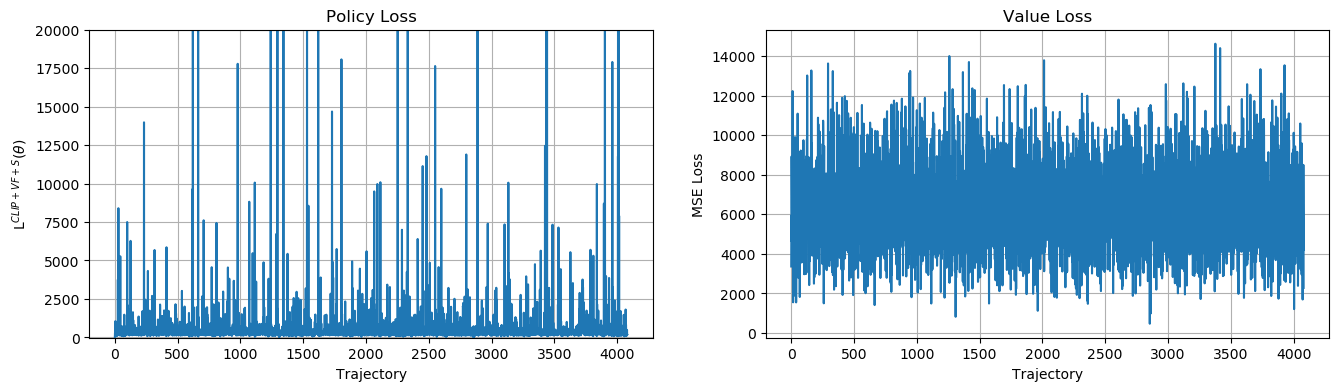

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for ax in axs.flatten():
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.grid(True)

axs[0].plot(policy_loss)
axs[0].set_title('Policy Loss')
axs[0].set_xlabel('Trajectory')
axs[0].set_ylabel(r'L$^{CLIP+VF+S}$($\theta$)')
axs[0].set_ybound(-20,20000)
# axs[0].legend()

# Plot average rewards per step over episodes
axs[1].plot(value_loss)
axs[1].set_title('Value Loss')
axs[1].set_xlabel('Trajectory')
axs[1].set_ylabel('MSE Loss')

In [51]:
import os
import re
import time

def find_files_with_number(folder_path, number):
    """
    Find files in a folder containing a specified number in their filename
    and return their last modified timestamp.

    Args:
        folder_path (str): Path to the folder to search.
        number (int): The number to search for in filenames.

    Returns:
        dict: A dictionary containing filenames as keys and their last modified timestamps as values.
    """
    file_timestamps = {}
    for filename in os.listdir(folder_path):
        if '_' + str(number) in filename:  # Search for the number in filename
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path):  # Check if it's a file
                last_modified = os.path.getmtime(file_path)  # Get last modified timestamp
                file_timestamps[file_path] = last_modified
    return file_timestamps

def delete_files_modified_after(folder_path, timestamp):
    """
    Delete files in a folder that were modified after a given timestamp.

    Args:
        folder_path (str): Path to the folder to delete files from.
        timestamp (float): Timestamp to compare against for deletion.
    """
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):  # Check if it's a file
            last_modified = os.path.getmtime(file_path)  # Get last modified timestamp
            if last_modified > timestamp:
                os.remove(file_path)  # Delete file

# Example usage:
folder_path = '/media/ryan/DataPad/ros_ws/src/notspot_sim_py/src/reinforcement_learning/runs/2024_04_27_11_10_18'
folder_path += '/steps'
number = 75  # Example number to search for
# timestamp = time.time() - (24 * 3600)  # Example: 24 hours ago

# Find files containing the number in their filename and their last modified timestamps
files_with_number = find_files_with_number(folder_path, number)
print("Files containing number {} and their last modified timestamps:".format(number))
for filename, timestamp in files_with_number.items():
    print(filename, timestamp)

# Delete files modified after the specified timestamp
delete_files_modified_after(folder_path, timestamp)
print("Files modified after timestamp {} have been deleted.".format(timestamp))


Files containing number 75 and their last modified timestamps:
/media/ryan/DataPad/ros_ws/src/notspot_sim_py/src/reinforcement_learning/runs/2024_04_27_11_10_18/steps/episode_75.txt 1714232633.3253686
Files modified after timestamp 1714232633.3253686 have been deleted.
